# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    response = requests.get(city_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response["weather"]

        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
        
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | balkhash
Processing Record 2 of Set 1 | yumen
Processing Record 3 of Set 1 | east london
Processing Record 4 of Set 1 | portland
Processing Record 5 of Set 1 | tumarbong
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | nuevitas
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | canavieiras
Processing Record 11 of Set 1 | grand centre
City not found. Skipping...
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | baykit
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | kampong thum
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | phan rang
City not found. Skipping...
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | garden city
Processing R

Processing Record 35 of Set 4 | ust-kut
Processing Record 36 of Set 4 | ahipara
Processing Record 37 of Set 4 | tasiilaq
Processing Record 38 of Set 4 | bima
Processing Record 39 of Set 4 | ngunguru
Processing Record 40 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 41 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 42 of Set 4 | emerald
Processing Record 43 of Set 4 | hofn
Processing Record 44 of Set 4 | dakoro
Processing Record 45 of Set 4 | amuntai
Processing Record 46 of Set 4 | kaeo
Processing Record 47 of Set 4 | cockburn town
Processing Record 48 of Set 4 | korla
Processing Record 49 of Set 4 | nome
Processing Record 0 of Set 5 | acapulco
Processing Record 1 of Set 5 | kodinsk
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | margate
Processing Record 4 of Set 5 | upernavik
Processing Record 5 of Set 5 | aksarka
Processing Record 6 of Set 5 | richards bay
Processing Record 7 of Set 5 | ambulu
Processing Record 8 of Set 

Processing Record 25 of Set 8 | kutum
Processing Record 26 of Set 8 | nedjo
Processing Record 27 of Set 8 | macapa
Processing Record 28 of Set 8 | tsaratanana
Processing Record 29 of Set 8 | genhe
Processing Record 30 of Set 8 | belmonte
Processing Record 31 of Set 8 | ciumeghiu
Processing Record 32 of Set 8 | geraldton
Processing Record 33 of Set 8 | tulum
Processing Record 34 of Set 8 | simao
Processing Record 35 of Set 8 | sorland
Processing Record 36 of Set 8 | shumskiy
Processing Record 37 of Set 8 | rock sound
Processing Record 38 of Set 8 | natitingou
Processing Record 39 of Set 8 | kirakira
Processing Record 40 of Set 8 | petatlan
Processing Record 41 of Set 8 | stornoway
Processing Record 42 of Set 8 | sur
Processing Record 43 of Set 8 | san quintin
Processing Record 44 of Set 8 | fairbanks
Processing Record 45 of Set 8 | ballina
Processing Record 46 of Set 8 | ketchikan
Processing Record 47 of Set 8 | parry sound
Processing Record 48 of Set 8 | poum
Processing Record 49 of Se

Processing Record 13 of Set 12 | fraserburgh
Processing Record 14 of Set 12 | safaga
Processing Record 15 of Set 12 | kalabo
Processing Record 16 of Set 12 | aykhal
Processing Record 17 of Set 12 | tonantins
Processing Record 18 of Set 12 | owerri
Processing Record 19 of Set 12 | lazarev
Processing Record 20 of Set 12 | metro
Processing Record 21 of Set 12 | coos bay
Processing Record 22 of Set 12 | buraydah
Processing Record 23 of Set 12 | ixtapa
Processing Record 24 of Set 12 | chiredzi
Processing Record 25 of Set 12 | tamboril
Processing Record 26 of Set 12 | novyy urengoy
Processing Record 27 of Set 12 | okhotsk
Processing Record 28 of Set 12 | marquette
Processing Record 29 of Set 12 | hargeysa
Processing Record 30 of Set 12 | shangzhi
Processing Record 31 of Set 12 | gat
Processing Record 32 of Set 12 | brainerd
Processing Record 33 of Set 12 | xining
Processing Record 34 of Set 12 | uni
Processing Record 35 of Set 12 | kavaratti
Processing Record 36 of Set 12 | pacific grove
Pro

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,balkhash,46.8440,74.9804,-9.66,62,0,13.00,KZ,1679276238
1,yumen,40.2833,97.2000,7.33,28,1,17.68,CN,1679276239
2,east london,-33.0153,27.9116,24.77,65,100,4.19,ZA,1679276239
3,portland,45.5234,-122.6762,11.02,89,100,3.09,US,1679275779
4,tumarbong,10.3766,119.4579,28.53,73,40,4.72,PH,1679276240


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,balkhash,46.8440,74.9804,-9.66,62,0,13.00,KZ,1679276238
1,yumen,40.2833,97.2000,7.33,28,1,17.68,CN,1679276239
2,east london,-33.0153,27.9116,24.77,65,100,4.19,ZA,1679276239
3,portland,45.5234,-122.6762,11.02,89,100,3.09,US,1679275779
4,tumarbong,10.3766,119.4579,28.53,73,40,4.72,PH,1679276240


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

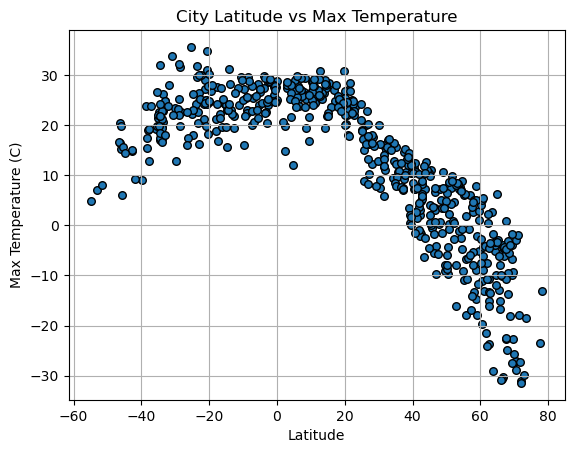

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp', s = 30, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

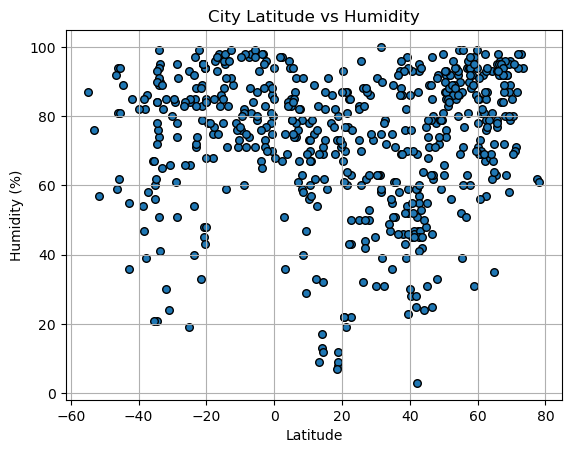

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x = 'Lat', y = 'Humidity', s = 30,  edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

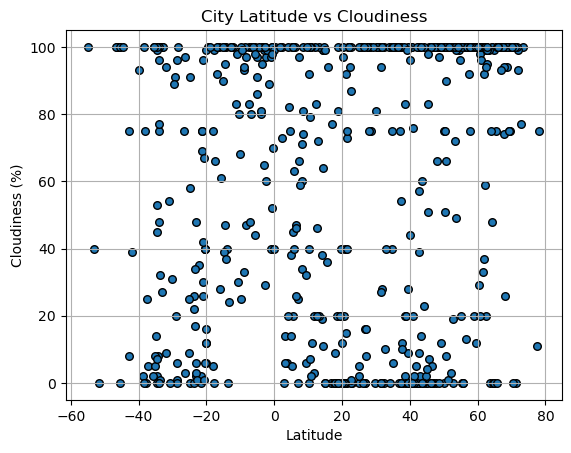

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness', s = 30,  edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

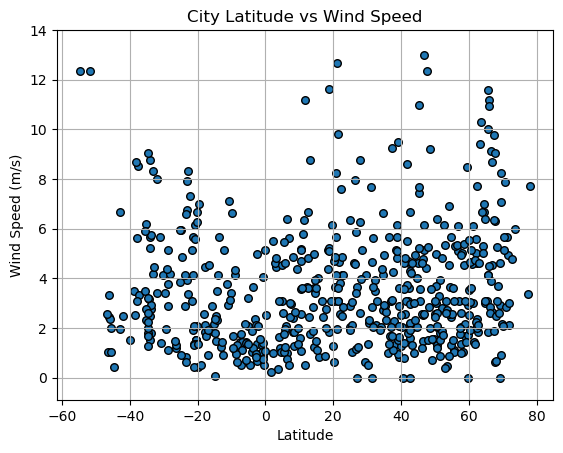

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed', s = 30,  edgecolors='black')

# Incorporate the other graph properties
plt.ylim(top=14)
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Create scatter plot
    sns.scatterplot(x=x_values, y=y_values)
    # Add equation to plot
    plt.plot(x_values, intercept + slope * x_values, color="red")
    
    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
    # Show plot
    plt.show()
    print(f"The r value is: {r_value}")


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,balkhash,46.8440,74.9804,-9.66,62,0,13.00,KZ,1679276238
1,yumen,40.2833,97.2000,7.33,28,1,17.68,CN,1679276239
3,portland,45.5234,-122.6762,11.02,89,100,3.09,US,1679275779
4,tumarbong,10.3766,119.4579,28.53,73,40,4.72,PH,1679276240
5,ponta do sol,32.6667,-17.1000,17.06,79,10,2.11,PT,1679276241


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,east london,-33.0153,27.9116,24.77,65,100,4.19,ZA,1679276239
9,canavieiras,-15.6750,-38.9472,24.44,86,61,1.90,BR,1679276244
10,cape town,-33.9258,18.4232,17.28,89,75,8.75,ZA,1679276245
13,port alfred,-33.5906,26.8910,20.66,95,100,1.79,ZA,1679276247
15,mataura,-46.1927,168.8643,16.38,81,100,2.46,NZ,1679276209


###  Temperature vs. Latitude Linear Regression Plot

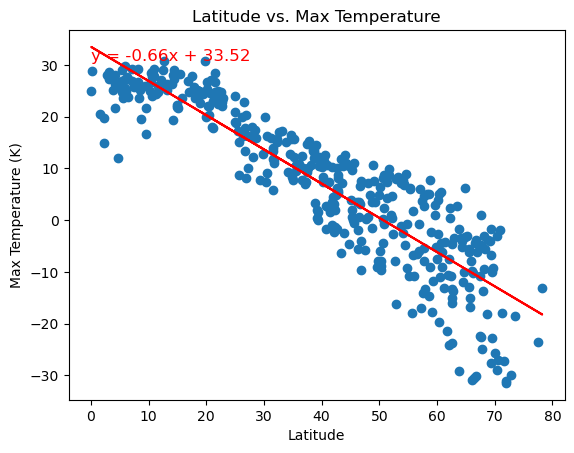

The r value is: -0.8970734782087105


In [27]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (K)', 'Latitude vs. Max Temperature')


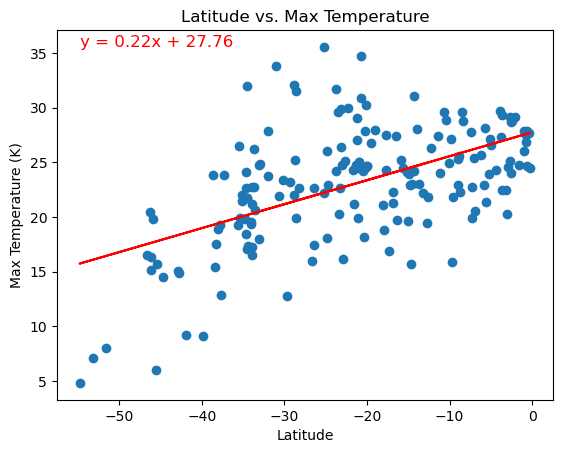

The r value is: 0.5488564299877736


In [28]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Latitude', 'Max Temperature (K)', 'Latitude vs. Max Temperature')

**Discussion about the linear relationship:** There is a strong negative correlation between latitude and temperature in the Northern Hemisphere, while there is a moderate positive correlation between the two variables in the Southern Hemisphere. This suggests that as we move towards the poles in the Northern Hemisphere, the temperature tends to decrease, while in the Southern Hemisphere, the temperature tends to increase towards the equator.

### Humidity vs. Latitude Linear Regression Plot

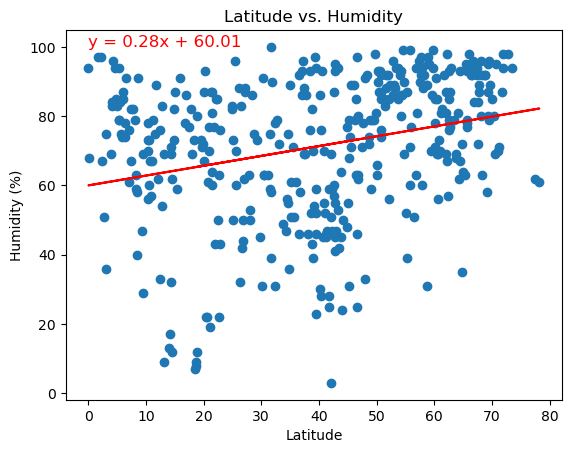

The r value is: 0.27658535353160235


In [18]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', 'Latitude vs. Humidity')

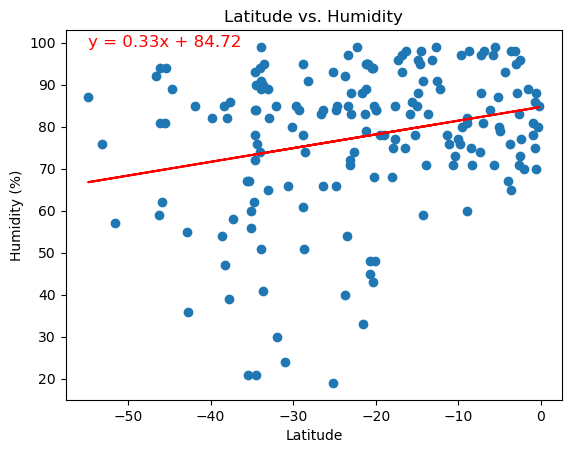

The r value is: 0.2504135364192924


In [19]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Latitude', 'Humidity (%)', 'Latitude vs. Humidity')

**Discussion about the linear relationship:** The linear regression analysis for latitude vs. humidity suggest that there is a weak positive correlation in both the Northern Hemisphere and the Southern Hemisphere. This suggests that there is a slight tendency for humidity to increase as we move towards the poles in the Northern Hemisphere and the Southern Hemisphere.



### Cloudiness vs. Latitude Linear Regression Plot

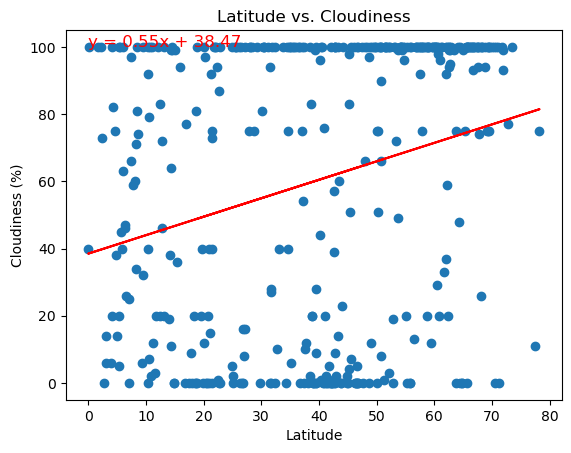

The r value is: 0.26213795297260495


In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Latitude vs. Cloudiness')


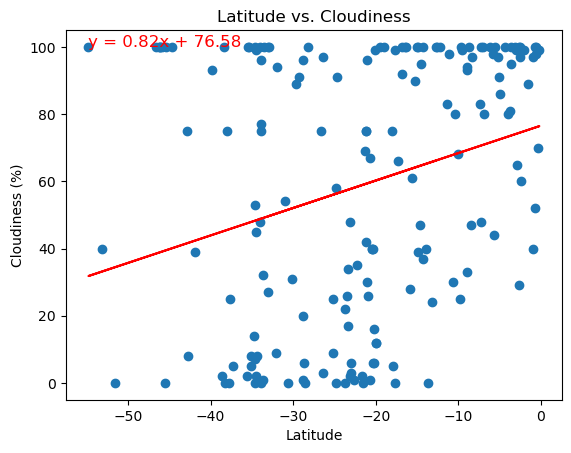

The r value is: 0.2796510061783211


In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Latitude', 'Cloudiness (%)', 'Latitude vs. Cloudiness')


**Discussion about the linear relationship:** Comparing the linear regression analysis for latitude vs. cloudiness, we can see that there is a weak positive correlation in both hemispheres, which suggests that the cloudiness increases when we move towards the poles in Northern and Southern Hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

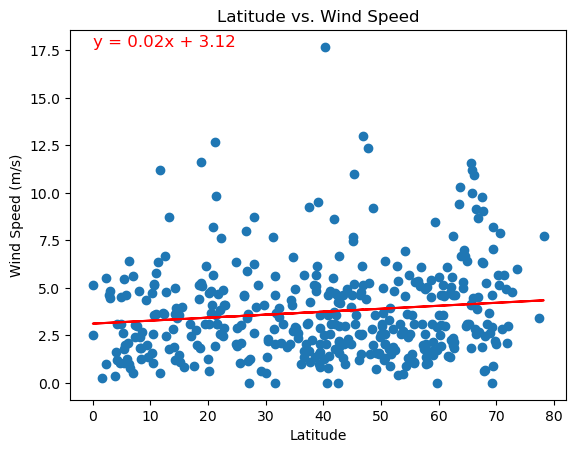

The r value is: 0.1262886401761194


In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 'Latitude vs. Wind Speed')

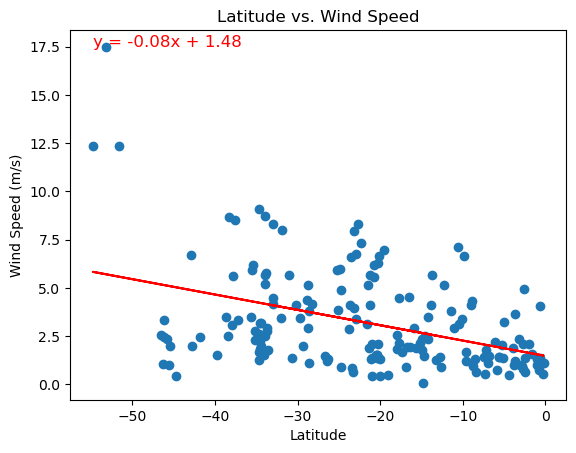

The r value is: -0.4133887376647155


In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Latitude', 'Wind Speed (m/s)', 'Latitude vs. Wind Speed')

**Discussion about the linear relationship:** Comparing the linear regression analysis for latitude vs. wind speed, we can see that there is a weak positive correlation in the Northern Hemisphere, while there is a weak negative correlation in the Southern Hemisphere. This suggests that the wind speed tends to increase slightly as we move towards the poles in the Northern Hemisphere, while it tends to decrease in the Southern Hemisphere.